# üìä M√≥dulo 3 ‚Äì An√°lisis Exploratorio de Datos (EDA)

En este notebook exploraremos el dataset `salarios_pais.csv` con **Pandas**, **Matplotlib** y **Seaborn**.

## üéØ Objetivos
- Comprender qu√© es el EDA y por qu√© es fundamental.
- Identificar patrones, tendencias y outliers.
- Usar el tipo de gr√°fico m√°s adecuado seg√∫n la pregunta.
- Comunicar hallazgos con visualizaciones claras.

## Recuerden la Estructura de un proyecto

Una estructura recomendada puede ser:
```
project-name/
‚îú‚îÄ‚îÄ assest/           # Imagenes, graficos (generalmente no se sube a github)
‚îú‚îÄ‚îÄ data/             # Datos crudos y procesados
    ‚îú‚îÄ‚îÄ‚îÄ‚îÄ raw/   
    ‚îú‚îÄ‚îÄ‚îÄ‚îÄ processed/   --> Datos limpios
‚îú‚îÄ‚îÄ notebooks/        # Notebooks del proyecto
‚îú‚îÄ‚îÄ utils/            # Funciones auxiliares
‚îú‚îÄ‚îÄ docs/             # Documentaci√≥n
‚îú‚îÄ‚îÄ README.md         # Descripci√≥n general
‚îú‚îÄ‚îÄ environment.yml   # Dependencias usando conda
‚îî‚îÄ‚îÄ requirements.txt  # Dependencias usando pip

---
## 0 ¬∑ Setup
Cargamos librer√≠as y configuramos Seaborn para que los gr√°ficos se vean con un estilo agradable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### 0.1 ¬∑ Carga del dataset transformado
Aseg√∫rate de que `salarios_pais.csv` se encuentra en la ruta `data/processed/`.


In [3]:
#Especifica la ruta inicial de trabajo
import os 

os.chdir('C:/Users/dsiba/Documents//Cursos/An√°lisis de datos con Python/pydatapanama-cursos')
print(os.getcwd())

C:\Users\dsiba\Documents\Cursos\An√°lisis de datos con Python\pydatapanama-cursos


In [4]:
#Importar la carpeta de datos raw desde paths
from cursos.analisis_datos.utils.paths import DATA_PROCESSED_DIR

#definir un path o ruta con Path
path_salarios_pais = DATA_PROCESSED_DIR / "salarios_pais.csv"
path_salarios_pais = str(path_salarios_pais)

print(f"Ruta del archivo salarios_pais: {path_salarios_pais}")
print(f"existe archivo salarios_pais: {Path(path_salarios_pais).exists()}")

Ruta del archivo salarios_pais: C:\Users\dsiba\Documents\Cursos\An√°lisis de datos con Python\pydatapanama-cursos\cursos\analisis_datos\data\processed\salarios_pais.csv
existe archivo salarios_pais: True


In [5]:
df_salarios_pais = pd.read_csv(filepath_or_buffer=path_salarios_pais, sep=',', encoding='utf-8')
df_salarios_pais.head()

nombre apellido  edad      pais educacion_universitaria  \
0      Jos√©    L√≥pez    36     Chile                      S√≠   
1  Fernanda   Vargas    39     Chile                      S√≠   
2  Fernanda  Ram√≠rez    30  Colombia                      No   
3      Jos√©    G√≥mez    35     Chile                      S√≠   
4       Ana    P√©rez    32    Panam√°                      No   

  nombre_de_la_empresa                      cargo  anos_en_la_empresa  \
0        Mercado Libre           Python Developer                   2   
1               Amazon       AI Software Engineer                   2   
2             Facebook  Machine Learning Engineer                   2   
3        Mercado Libre           Python Developer                  12   
4               Amazon            Project Manager                   2   

   sueldo_anual_dolares  bono_anual_euros  bono_anual_dolares  \
0               71841.0            4981.0              5479.1   
1              142115.0            1252.0              1377.2   
2               92278.0            5262.0              5788.2   
3               97130.0            3671.0              4038.1   
4               61413.0           10190.0             11209.0   

            capital  cantidad_de_habitantes           PIB  ingreso_per_capita  \
0          Santiago              19116209.0  3.170000e+11             16580.0   
1          Santiago              19116209.0  3.170000e+11             16580.0   
2            Bogot√°              51874024.0  3.430000e+11              6611.0   
3          Santiago              19116209.0  3.170000e+11             16580.0   
4  Ciudad de Panam√°               4468000.0  7.600000e+10             16995.0   

   compensacion_total senioridad  
0             77320.1     Junior  
1            143492.2     Junior  
2             98066.2     Junior  
3            101168.1     Senior  
4             72622.0     Junior

---
## 1 ¬∑ Revisi√≥n general
Antes de graficar, entendamos la estructura de los datos.


In [6]:
df_salarios_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nombre                   307 non-null    object 
 1   apellido                 307 non-null    object 
 2   edad                     307 non-null    int64  
 3   pais                     307 non-null    object 
 4   educacion_universitaria  307 non-null    object 
 5   nombre_de_la_empresa     307 non-null    object 
 6   cargo                    307 non-null    object 
 7   anos_en_la_empresa       307 non-null    int64  
 8   sueldo_anual_dolares     307 non-null    float64
 9   bono_anual_euros         307 non-null    float64
 10  bono_anual_dolares       307 non-null    float64
 11  capital                  307 non-null    object 
 12  cantidad_de_habitantes   307 non-null    float64
 13  PIB                      307 non-null    float64
 14  ingreso_per_capita       3

In [7]:
df_salarios_pais.describe().T.head(10)

count          mean           std           min  \
edad                    307.0  4.084365e+01  1.156348e+01  2.200000e+01   
anos_en_la_empresa      307.0  6.459283e+00  3.990283e+00  0.000000e+00   
sueldo_anual_dolares    307.0  8.582545e+04  2.625449e+04  3.536400e+04   
bono_anual_euros        307.0  7.961743e+03  3.975691e+03  1.069000e+03   
bono_anual_dolares      307.0  8.757917e+03  4.373260e+03  1.175900e+03   
cantidad_de_habitantes  307.0  3.859265e+07  3.962670e+07  3.518552e+06   
PIB                     307.0  4.267248e+11  4.365595e+11  7.100000e+10   
ingreso_per_capita      307.0  1.335539e+04  4.380176e+03  6.611000e+03   
compensacion_total      307.0  9.458337e+04  2.683055e+04  3.716470e+04   

                                 25%           50%           75%           max  
edad                    3.000000e+01  4.100000e+01  5.100000e+01  6.000000e+01  
anos_en_la_empresa      3.000000e+00  6.000000e+00  1.000000e+01  1.300000e+01  
sueldo_anual_dolares    6.438200e+04  8.420400e+04  1.004595e+05  1.552810e+05  
bono_anual_euros        4.470000e+03  8.139000e+03  1.159350e+04  1.497900e+04  
bono_anual_dolares      4.917000e+03  8.952900e+03  1.275285e+04  1.647690e+04  
cantidad_de_habitantes  5.150000e+06  3.392585e+07  5.187402e+07  1.260140e+08  
PIB                     8.650000e+10  3.170000e+11  6.410000e+11  1.410000e+12  
ingreso_per_capita      9.545000e+03  1.412000e+04  1.658000e+04  2.030000e+04  
compensacion_total      7.387320e+04  9.205910e+04  1.097174e+05  1.678067e+05

---
## 2 ¬∑ An√°lisis Univariado (una variable)
### ¬øQu√© gr√°fico usar?
| Objetivo | Variable | Tipo de gr√°fico |
|----------|----------|-----------------|
| Distribuci√≥n de valores | Num√©rica | **Histograma** (frecuencia) |
| Detecci√≥n de outliers | Num√©rica | **Boxplot** / **Violinplot** |
| Frecuencia de categor√≠as | Categ√≥rica | **Bar plot** |


### üìà ¬øQu√© es el an√°lisis univariado?

El **an√°lisis univariado** examina **una sola variable** para entender su comportamiento sin considerar otras. Permite:

- Conocer **distribuci√≥n** y **tendencia central** (media, mediana, moda).  
- Detectar **outliers** y asimetr√≠as.  
- Resumir **dispersi√≥n** (rango, varianza, IQR).

Se usa al inicio de cualquier proyecto para obtener un panorama general de cada variable.  
**Gr√°ficos t√≠picos:** histograma, boxplot, barplot (si es categ√≥rica) y tablas de frecuencia.

### 2.1 ¬∑ Histograma ‚Äì `total_compensacion`
Los histogramas nos permiten ver la forma de la distribuci√≥n (asimetr√≠a, valores extremos).

> **Explicaci√≥n:**  
> Genera un **histograma** de la columna `compensacion_total` con 30 bins para ver la frecuencia de salarios y, adem√°s, dibuja una **curva KDE** (l√≠nea suave) que muestra la densidad estimada de la distribuci√≥n. Luego agrega t√≠tulo y etiqueta del eje X antes de mostrar el gr√°fico.

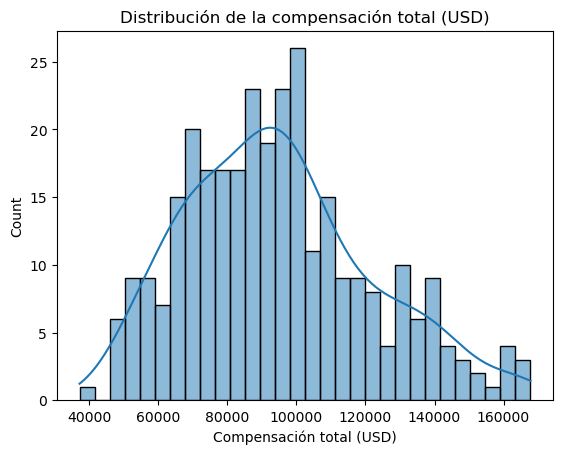

In [9]:
# ‚îÄ‚îÄ Ejercicio ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1. Traza un histograma de la columna 'compensacion_total'.
# 2. Usa 30 bins para ver el detalle de la distribuci√≥n
#    y activa la curva KDE (Kernel Density Estimate) para
#    superponer una l√≠nea suave que indique la densidad.
# 3. A√±ade un t√≠tulo y etiqueta del eje X para hacer
#    el gr√°fico auto-explicativo.
# 4. Llama a plt.show() para renderizarlo.

sns.histplot(data=df_salarios_pais, x='compensacion_total', bins=30, kde=True)
plt.title('Distribuci√≥n de la compensaci√≥n total (USD)')
plt.xlabel('Compensaci√≥n total (USD)')
plt.show()

### 2.2 ¬∑ Boxplot ‚Äì Detectar outliers por cargo
Los **boxplots** resumen la mediana, el rango intercuart√≠lico y muestran posibles valores at√≠picos.

**üì¶ ¬øCu√°ndo usar un boxplot?**  
Util√≠zalo cuando necesites resumir la **distribuci√≥n de una variable num√©rica** y:

* Comparar **m√∫ltiples grupos** (eje X categ√≥rico vs eje Y num√©rico).  
* Detectar **outliers** f√°cilmente (puntos fuera de los bigotes).  
* Visualizar la **mediana** y la **dispersi√≥n** (rango intercuart√≠lico).  

Ideal para contraste r√°pido entre cargos, pa√≠ses, experimentos A/B, etc.

**üîç C√≥mo leer un boxplot**

- **Caja (Box)**  
  Delimita el **rango intercuart√≠lico (IQR)**: del Q1 (25 %) al Q3 (75 %) de los datos.

- **L√≠nea central**  
  Marca la **mediana (Q2 / 50 %)**: el valor que divide la distribuci√≥n en dos mitades.

- **Extremos (‚Äúbigotes‚Äù)**  
  Se extienden hasta el valor m√°s bajo y m√°s alto **dentro de 1.5 √ó IQR**.  
  Puntos m√°s all√° se dibujan como **outliers** individuales.

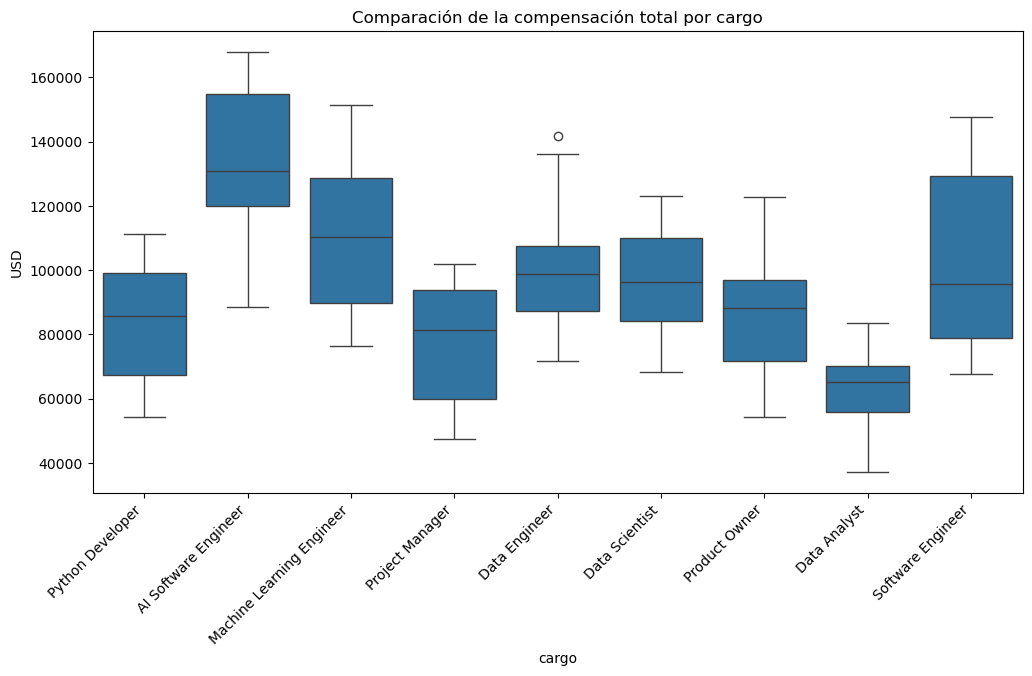

In [15]:
# ‚îÄ‚îÄ Ejercicio ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1. Crea un boxplot que compare la ‚Äòcompensacion_total‚Äô entre cargos.
# 2. Usa un canvas amplio (12√ó6) para que las etiquetas no se amontonen.
# 3. Rota los nombres de los cargos 45 ¬∞ y alin√©alos a la derecha
#    para que queden legibles bajo cada boxplot.
# 4. A√±ade t√≠tulo y etiqueta del eje Y (USD).
# 5. Finaliza con plt.show() para visualizar el gr√°fico.
plt.figure(figsize=(12,6))

sns.boxplot(data=df_salarios_pais, x='cargo', y='compensacion_total')

plt.xticks(rotation=45, ha='right')

plt.title('Comparaci√≥n de la compensaci√≥n total por cargo')
plt.ylabel('USD')
plt.show()

---
## 3 ¬∑ An√°lisis Bivariado
Ahora buscamos **relaciones** entre dos variables.

| Objetivo | Var. 1 | Var. 2 | Gr√°fico sugerido |
|----------|--------|--------|------------------|
| Relaci√≥n lineal | Num√©rica | Num√©rica | **Scatter** |
| Comparar distribuciones | Categ√≥rica | Num√©rica | **Box / Violin** |
| Media de grupos | Categ√≥rica | Num√©rica | **Barplot** (con `est=np.mean`) |


### üîó ¬øQu√© es el an√°lisis bivariado?

El **an√°lisis bivariado** estudia la **relaci√≥n entre dos variables** a la vez (X vs Y).  
Se usa para responder preguntas como:

* ¬øExiste correlaci√≥n entre a√±os de experiencia y salario?  
* ¬øC√≥mo var√≠a el ingreso promedio por pa√≠s?  
* ¬øLa categor√≠a A tiene mayor tasa de conversi√≥n que B?

Usa **scatterplots, box/violin plots, barplots o tablas de contingencia** seg√∫n si las variables son num√©ricas o categ√≥ricas.  
Empl√©alo cuando quieras identificar patrones, dependencias o diferencias entre dos dimensiones clave de tu dataset.

### 3.1 ¬∑ Scatter ‚Äì `anos_en_la_empresa` vs. `total_compensacion`


### üîµ ¬øQu√© es un *scatterplot*?

Un **scatterplot** (diagrama de dispersi√≥n) representa dos variables num√©ricas
mediante puntos en un plano cartesiano:

* **Eje X** ‚Üí variable independiente  
* **Eje Y** ‚Üí variable dependiente

Cada punto corresponde a una observaci√≥n (fila).  
Permite visualizar la **relaci√≥n** entre ambas variables y detectar patrones.

---

#### üïí ¬øCu√°ndo usarlo?

| Objetivo | Ejemplo |
|----------|---------|
| **Correlaci√≥n** (¬øsuben/junto o bajan?) | A√±os de experiencia vs salario |
| **Tendencia lineal / no lineal** | Temperatura vs consumo el√©ctrico |
| **Densidad de puntos** | Clientes vs compras en distintas horas |
| **Outliers** | Ventas at√≠picas en un mes espec√≠fico |
| **Comparar grupos** <br>(con `hue`, `style`, `size`) | Senioridad coloreada por categor√≠a |

> üîë Ideal cuando **ambas variables son cuantitativas** y deseas ver la forma
  de su relaci√≥n antes de aplicar un modelo o c√°lculo estad√≠stico.

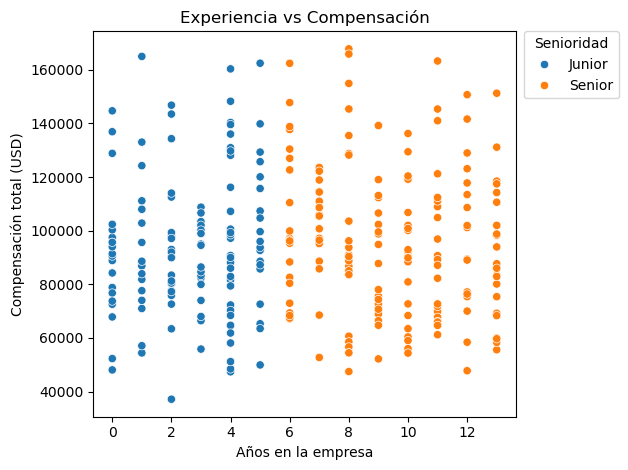

In [16]:
# ‚îÄ‚îÄ Ejercicio ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1. Dibuja un scatterplot para analizar la relaci√≥n entre:
#    - X: a√±os en la empresa
#    - Y: compensaci√≥n total
# 2. Colorea los puntos por nivel de 'senioridad' con el par√°metro hue
#    para distinguir r√°pidamente Juniors y Seniors.
# 3. Coloca la leyenda fuera del √°rea de datos usando bbox_to_anchor‚Äê
#    (1.02,1) y loc='upper left', de modo que no tape ning√∫n punto.
# 4. A√±ade t√≠tulo y etiquetas de ejes con unidades.
# 5. Aplica tight_layout() para ajustar los m√°rgenes antes de mostrar.

ax = sns.scatterplot(
    data=df_salarios_pais,
    x="anos_en_la_empresa",
    y="compensacion_total",
    hue="senioridad"
)

plt.title("Experiencia vs Compensaci√≥n")
plt.ylabel("Compensaci√≥n total (USD)")
plt.xlabel("A√±os en la empresa")

# Mover la leyenda fuera (a la derecha)
plt.legend(
    title="Senioridad",
    bbox_to_anchor=(1.02, 1),   # posici√≥n relativa al eje
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()             # ajusta el padding del canvas
plt.show()

### 3.2 ¬∑ Barplot ‚Äì Compensaci√≥n media por pa√≠s
`est=np.min` nos da el m√≠nimo por grupo.

### üìä ¬øQu√© muestra este barplot?

Cada barra representa la **compensaci√≥n total m√≠nima** (o el estad√≠stico elegido con `estimator`, p. ej. `np.mean`, `np.min`, `np.max`) para un pa√≠s.  
La altura indica el valor del estad√≠stico y las l√≠neas verticales (error bars) se√±alan la **incertidumbre**‚Äîpor defecto, el intervalo de confianza del 95 % calculado por Seaborn.

---

#### üïí ¬øCu√°ndo usar un *barplot*?

| Situaci√≥n | Ejemplo |
|-----------|---------|
| **Comparar una m√©trica agregada** entre categor√≠as discretas | Salario medio por pa√≠s, ventas promedio por trimestre |
| **Visualizar m√≠nimos / m√°ximos** por grupo (usando `estimator=np.min` o `np.max`) | M√≠nimo tiempo de respuesta por equipo |
| Mostrar **tendencias claras y ordenadas** cuando los grupos no son demasiados y los valores se agregan de modo sencillo | Tasa de conversi√≥n por canal de marketing |



> Un barplot es apropiado cuando quieres una **comparaci√≥n r√°pida y legible** de un estad√≠stico (media, mediana, etc.) calculado a partir de muchas observaciones dentro de cada categor√≠a.

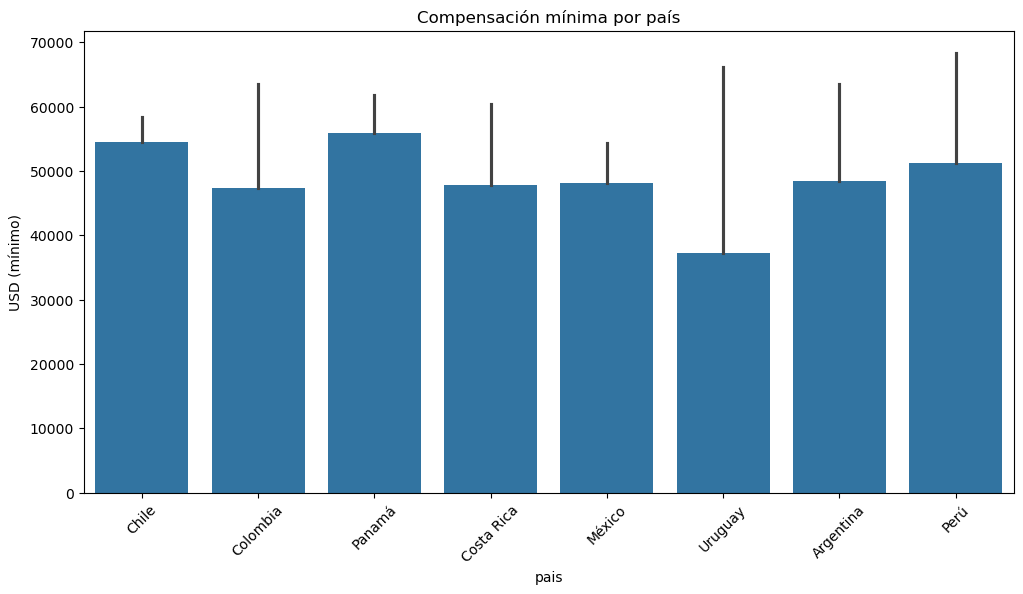

In [17]:
# ‚îÄ‚îÄ Ejercicio ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1. Crea un barplot que muestre la **compensaci√≥n m√≠nima** por pa√≠s
#    (usa estimator=np.min). Ideal para comparar pisos salariales.
# 2. Incluye barras de error con un intervalo de confianza del 95 %
#    mediante errorbar=('ci', 95).
# 3. Ajusta la figura a 12√ó6 y rota las etiquetas de los pa√≠ses 45 ¬∞
#    para que no se solapen.
# 4. A√±ade un t√≠tulo descriptivo y etiqueta del eje Y indicando que se
#    trata de valores m√≠nimos en USD.
# 5. Finaliza con plt.show().

plt.figure(figsize=(12,6))
sns.barplot(data=df_salarios_pais, x='pais', y='compensacion_total', estimator=np.min, errorbar=('ci', 95))
plt.xticks(rotation=45)
plt.title('Compensaci√≥n m√≠nima por pa√≠s')
plt.ylabel('USD (m√≠nimo)')
plt.show()

---
## 4 ¬∑ An√°lisis de correlaci√≥n
La matriz de correlaci√≥n nos ayuda a detectar relaciones lineales entre variables num√©ricas. Un **heatmap** lo hace m√°s visual.

### üî• ¬øCu√°ndo usar una matriz de correlaci√≥n y su heatmap?

| Herramienta | ¬øQu√© es? | ¬øCu√°ndo te ayuda? |
|-------------|----------|-------------------|
| **Matriz de correlaci√≥n (`df.corr()`)** | Tabla num√©rica que muestra la **fuerza y direcci√≥n** (‚àí1 ‚á¢ 1) de la relaci√≥n lineal entre pares de variables cuantitativas. | *Diagn√≥stico r√°pido* de:  <br>‚Ä¢ **Multicolinealidad** antes de un modelo (variables muy correlacionadas inflan la varianza).<br>‚Ä¢ Selecci√≥n de *features*: descartar las que aportan informaci√≥n redundante.<br>‚Ä¢ Descubrir relaciones inesperadas para hip√≥tesis futuras. |
| **Heatmap de correlaci√≥n (`sns.heatmap(corr)`)** | Representaci√≥n visual en la que los valores de la matriz se codifican con una paleta de colores (rojo/azul, etc.). | *Comunicaci√≥n e insight visual*: <br>‚Ä¢ Detectar **patrones** y **bloques** de variables correlacionadas de un vistazo.<br>‚Ä¢ Presentar hallazgos a personas no t√©cnicas (m√°s intuitivo que la tabla num√©rica).<br>‚Ä¢ Focalizar la atenci√≥n en correlaciones fuertes o an√≥malas. |

üí° **Recomendado** al inicio del EDA, justo despu√©s de limpiar y convertir a num√©rico, para orientar qu√© variables explorar m√°s a fondo y evitar sorpresas al modelar.

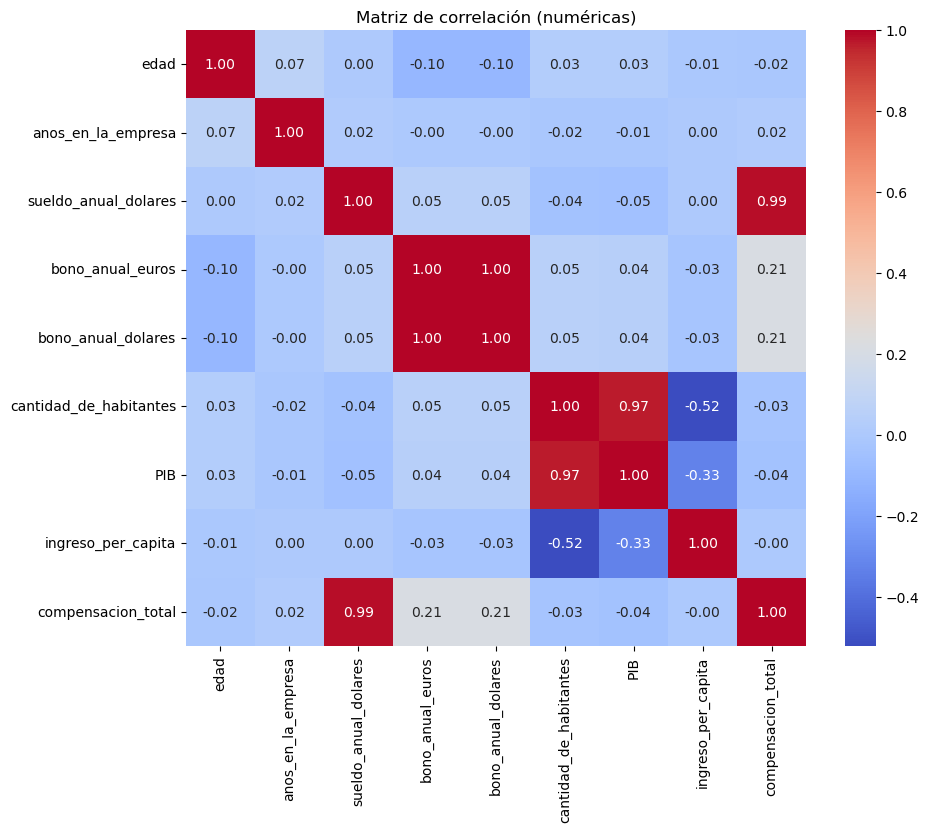

In [18]:
# ‚îÄ‚îÄ Ejercicio ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1. Selecciona s√≥lo las columnas num√©ricas con `select_dtypes`.
# 2. Calcula la matriz de correlaci√≥n (`corr()`) para ver qu√© tan
#    relacionadas est√°n las variables entre s√≠ (‚àí1 a 1).
# 3. Dibuja un heatmap con:
#    ‚Ä¢ `annot=True`   ‚Üí escribe el valor num√©rico en cada celda.
#    ‚Ä¢ `cmap='coolwarm'` ‚Üí paleta rojo‚Äìazul que resalta positivos y negativos.
#    ‚Ä¢ `fmt='.2f'`    ‚Üí muestra los n√∫meros con 2 decimales.
# 4. Ajusta la figura a 10√ó8 y a√±ade un t√≠tulo descriptivo.
# 5. Llama a plt.show() para visualizar la matriz de correlaci√≥n.

num_cols = df_salarios_pais.select_dtypes(include='number')
corr = num_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlaci√≥n (num√©ricas)')
plt.show()

> **Interpretaci√≥n r√°pida:** Valores cercanos a 1 o -1 indican correlaci√≥n fuerte. Aqu√≠ podemos investigar por qu√© ciertas variables est√°n altamente correlacionadas y si es l√≥gico seg√∫n el negocio.

---
## 5 ¬∑ Pairplot r√°pido (opcional, pesado en datasets grandes)
Muestra todas las combinaciones num√©ricas en una sola figura. √ötil para detectar relaciones de forma r√°pida.

### üîÑ ¬øCu√°ndo usar un *pairplot*?

Un **pairplot** (Seaborn `sns.pairplot`) genera, en una sola figura, todas las combinaciones posibles de **gr√°ficos bivariados** entre un conjunto de variables num√©ricas, junto con sus distribuciones univariadas en la diagonal.

#### üïë Cu√°ndo es √∫til

| Escenario | Por qu√© te ayuda |
|-----------|-----------------|
| **EDA r√°pido en datasets peque√±os/medianos** | Visualizas correlaciones, clusters y outliers sin escribir m√∫ltiples l√≠neas de c√≥digo. |
| **Comparar varias variables simult√°neamente** | Ves de un vistazo qu√© pares muestran relaci√≥n lineal o no, y c√≥mo es cada distribuci√≥n. |
| **Proyecto exploratorio o presentaci√≥n preliminar** | Ideal para ‚Äúmapear‚Äù el terreno antes de profundizar con an√°lisis espec√≠ficos. |

#### üí° Buenas pr√°cticas

- ‚ö†Ô∏è **No para datasets grandes**: cada extra variable aumenta combinaciones cuadr√°ticamente; puede volverse muy pesado.  
- ‚úÖ Limita el n√∫mero de variables (4-6) seleccionando solo las m√°s relevantes.  
- üé® Usa `hue` para colorear por categor√≠a y ver c√≥mo los grupos se separan en varias dimensiones.

> En resumen, emplea un *pairplot* como un ‚Äúpanel diagn√≥stico‚Äù inicial para descubrir patrones globales antes de elegir gr√°ficos o tests estad√≠sticos m√°s espec√≠ficos.

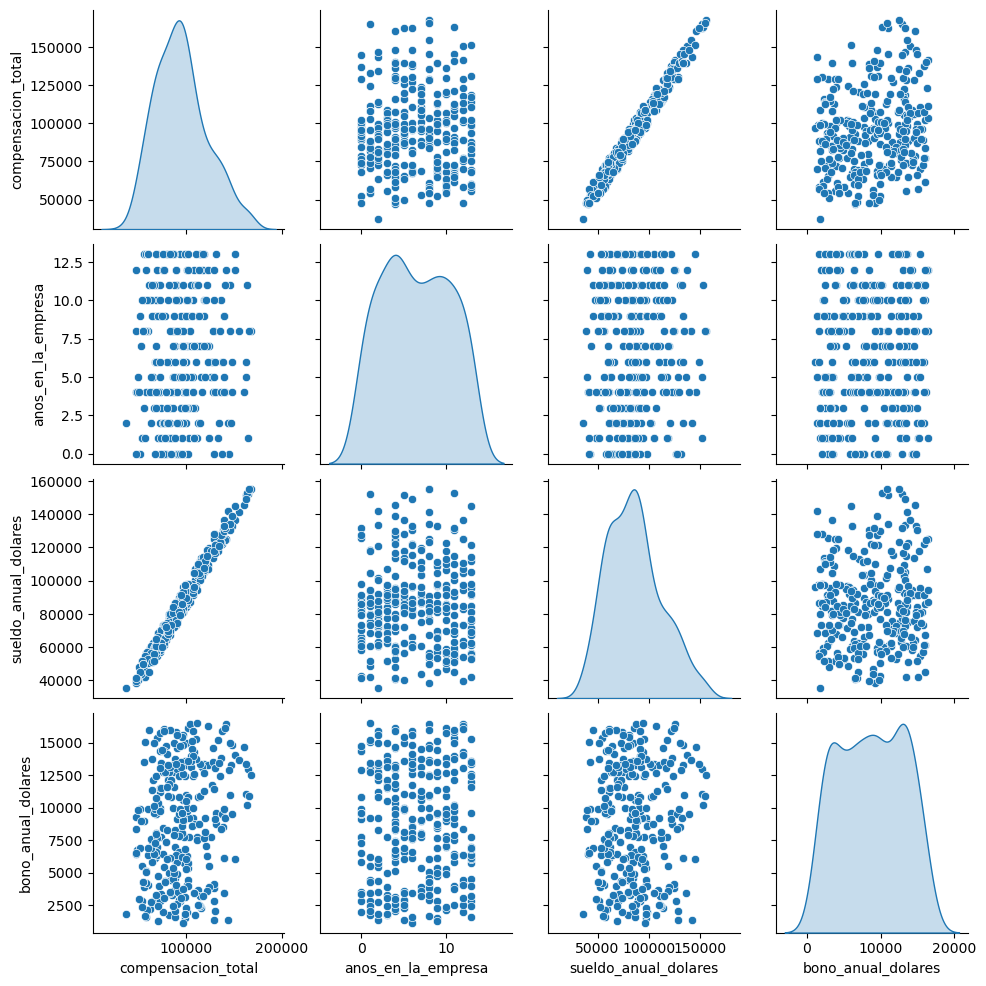

In [19]:
# ‚îÄ‚îÄ Ejercicio ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1. Genera un *pairplot* con Seaborn para las cuatro variables num√©ricas
#    seleccionadas: compensaci√≥n total, a√±os en la empresa, salario anual
#    y bono anual.
# 2. En cada parte inferior de la matriz ver√°s un scatter: relaci√≥n
#    bivariada entre pares de variables.
# 3. En la diagonal (`diag_kind='kde'`) se dibuja la densidad KDE de cada
#    variable (en lugar de un histograma) para que la forma de la
#    distribuci√≥n sea m√°s suave.
# 4. Este gr√°fico permite detectar de un vistazo correlaciones lineales,
#    clusters y outliers entre todas las combinaciones de variables.

sns.pairplot(df_salarios_pais[ ['compensacion_total', 'anos_en_la_empresa', 'sueldo_anual_dolares', 'bono_anual_dolares' ] ], diag_kind='kde')
plt.show()

---
## 6 üé® Buenas pr√°cticas al graficar con Matplotlib / Seaborn

### 1 ¬∑ Anatom√≠a de una figura

	‚Ä¢	Figure ‚Äì el lienzo general; puede contener uno o varios ejes.
	‚Ä¢	Axes ‚Äì √°rea donde se dibuja un gr√°fico individual (subplots).
	‚Ä¢	Axis ‚Äì los ejes x y y dentro de cada Axes.
	‚Ä¢	T√≠tulo, etiquetas, leyenda, grid ‚Äì elementos que a√±aden contexto.

üëâ Regla de oro: ajusta cada elemento conscientemente; evita configuraciones por defecto si dificultan la lectura.

### üïí ¬øCu√°ndo usar este patr√≥n?
*	Serie temporal: temperatura vs tiempo, ventas diarias, etc.
*	Funci√≥n matem√°tica: visualizar forma y ruido de una ecuaci√≥n.
*	Demostraci√≥n de principios: explicar ruido estad√≠stico o suavizado.

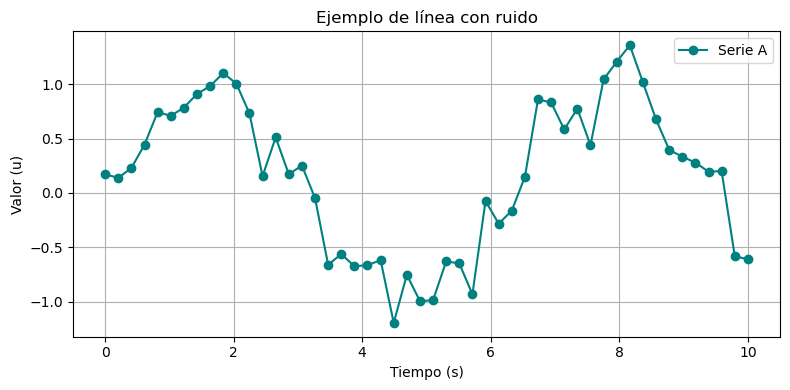

In [20]:
# Ejemplo de datos
x = np.linspace(0, 10, 50)
y = np.sin(x) + np.random.normal(0, .2, size=len(x))

# 1) Crea figura y eje
fig, ax = plt.subplots(figsize=(8, 4))

# 2) Grafica en ese eje
ax.plot(x, y, marker='o', linestyle='-', color='teal', label='Serie A')

# 3) Personaliza
ax.set_title('Ejemplo de l√≠nea con ruido')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Valor (u)')
ax.legend()
ax.grid(True)
ax.legend()
plt.tight_layout();           
plt.show()

**üóÇÔ∏è ¬øCu√°ndo usar subplots lado a lado?**

- Cuando necesitas **comparar dos vistas** de la misma variable (p. ej. distribuci√≥n vs evoluci√≥n temporal) sin ocupar varias figuras.
- Para **reportes o dashboards**: ahorras espacio y mantienes la narrativa en una sola imagen.
- Ideal en el EDA para ver la **forma global** (histograma) y el **comportamiento secuencial** (l√≠nea temporal) al mismo tiempo.

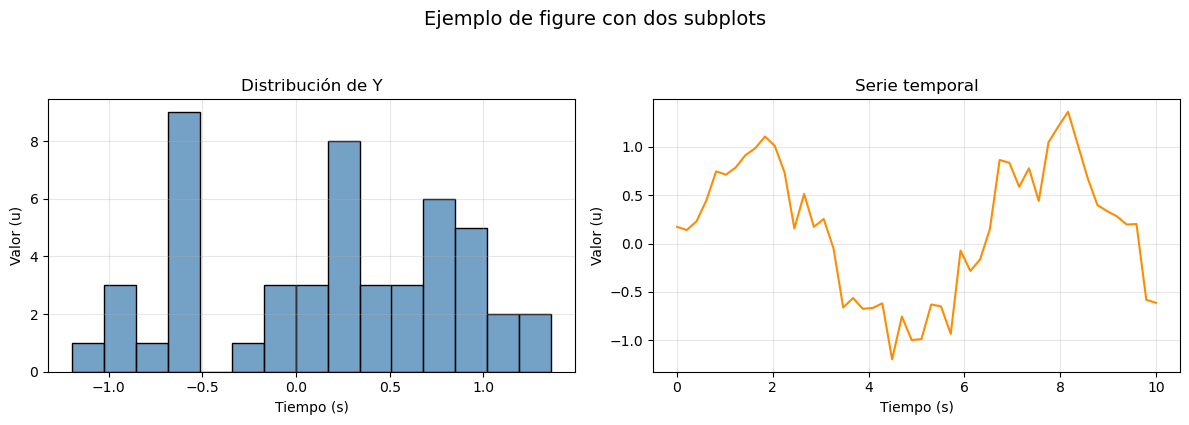

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Histograma
sns.histplot(y, bins=15, ax=axs[0], color='steelblue')
axs[0].set_title('Distribuci√≥n de Y')

# Serie temporal
axs[1].plot(x, y, color='darkorange')
axs[1].set_title('Serie temporal')

for ax in axs:
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Valor (u)')
    ax.grid(alpha=0.3)

plt.suptitle('Ejemplo de figure con dos subplots', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

**üîµ ¬øCu√°ndo usar este tipo de scatterplot m√∫ltiple?**

- Para visualizar la **relaci√≥n entre dos variables num√©ricas** (`total_bill` vs `tip`) mientras se **segmenta por dos factores categ√≥ricos**:
  - Color (`hue="sex"`) diferencia hombres y mujeres.
  - Marcador (`style="smoker"`) distingue fumadores de no fumadores.

√ötil cuando quieres detectar patrones o diferencias en grupos combinando tanto color como forma en un solo gr√°fico, manteniendo la leyenda fuera del √°rea de datos para no tapar puntos.

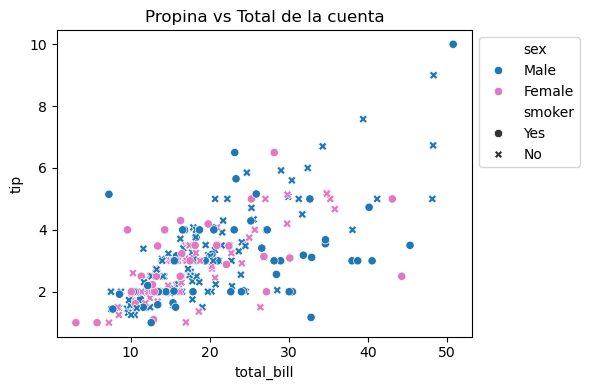

In [22]:
tips = sns.load_dataset("tips")

fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=tips, x="total_bill", y="tip",
                hue="sex", style="smoker",
                palette={"Male": "#1f77b4", "Female": "#e377c2"},
                ax=ax)

ax.set_title('Propina vs Total de la cuenta')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))  # fuera del plot
plt.tight_layout()
plt.show()

‚úÖ Checklist de buenas pr√°cticas
1.	Define figura y ejes expl√≠citos (fig, ax)
2.	Ajusta t√≠tulo, ejes y unidades; no dejes ‚ÄúTotal‚Äù sin aclarar qu√© es.
3.	Coloca la leyenda fuera si estorba los datos.
4.	Elige colores accesibles y consistentes.
5.	Usa tight_layout() o constrained_layout=True para evitar cortes.
6.	Exporta en alta resoluci√≥n (dpi=300) si lo usar√°s en informes impresos.
7.	Simplifica: quita elementos innecesarios y deja que la historia resalte.

---
## 7 ¬∑ Conclusiones del M√≥dulo 3
- Seleccionamos el gr√°fico seg√∫n la variable y la pregunta.
- Detectamos outliers y correlaciones para orientar an√°lisis futuros.
- Comunicar insights con visualizaciones claras es tan importante como el c√°lculo en s√≠.

‚û°Ô∏è Pr√≥ximo m√≥dulo: **responder preguntas de negocio** usando las transformaciones y visualizaciones aprendidas.
